In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')


In [17]:
dataset= pd.read_csv('cleaned_data.csv')

In [18]:
import seaborn as sns

In [19]:
dataset


,Unnamed: 0,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,Touchscreen,Price,rating
0,0,ASUS,Intel,Core i3,10,4,0,1024,0,34649,2
1,1,Lenovo,Intel,Core i3,10,4,0,1024,0,38999,3
2,2,Lenovo,Intel,Core i3,10,4,0,1024,0,39999,3
3,3,ASUS,Intel,Core i5,10,8,512,0,0,69990,3
4,4,ASUS,Intel,Core i5,10,8,0,1024,0,58799,3
...,...,...,...,...,...,...,...,...,...,...,...
554,554,APPLE,M1,M1,10,16,1024,0,0,169990,4
555,555,APPLE,M1,M1,10,16,1024,0,0,225990,4
556,556,APPLE,M1,M1,10,16,1024,0,0,243990,4
557,557,APPLE,M1,M1,10,32,1024,0,0,309990,5


In [20]:
dataset['hdd'].unique()


array([1024,    0,  512, 2048], dtype=int64)

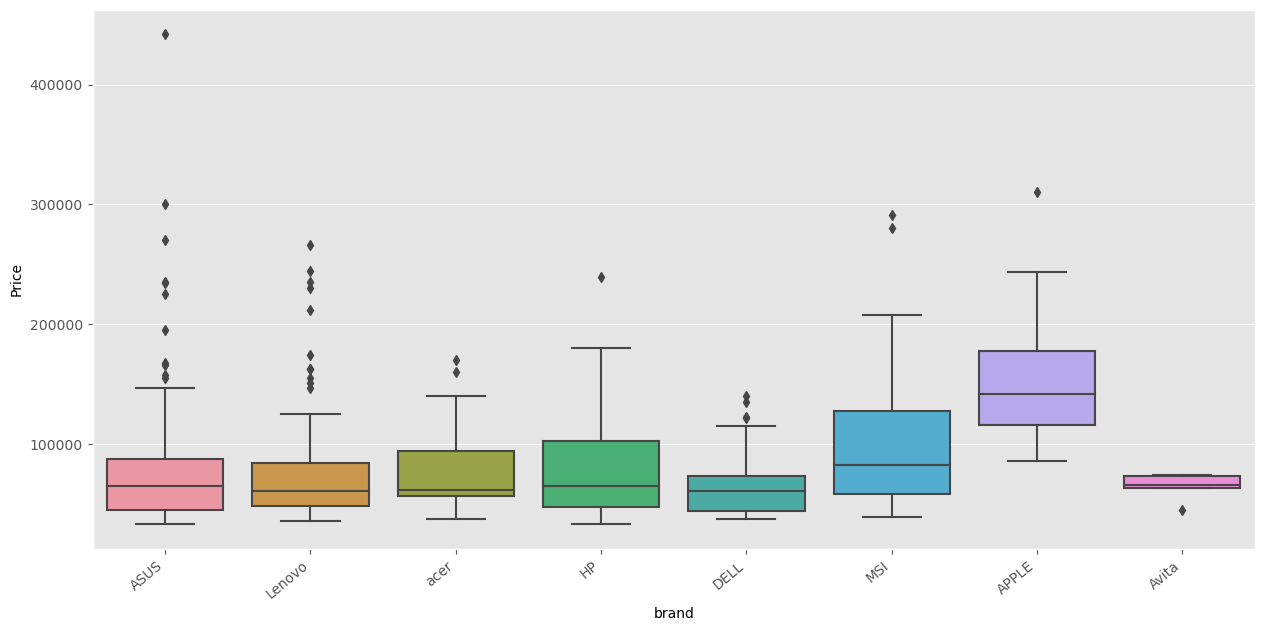

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='brand',y='Price',data=dataset)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

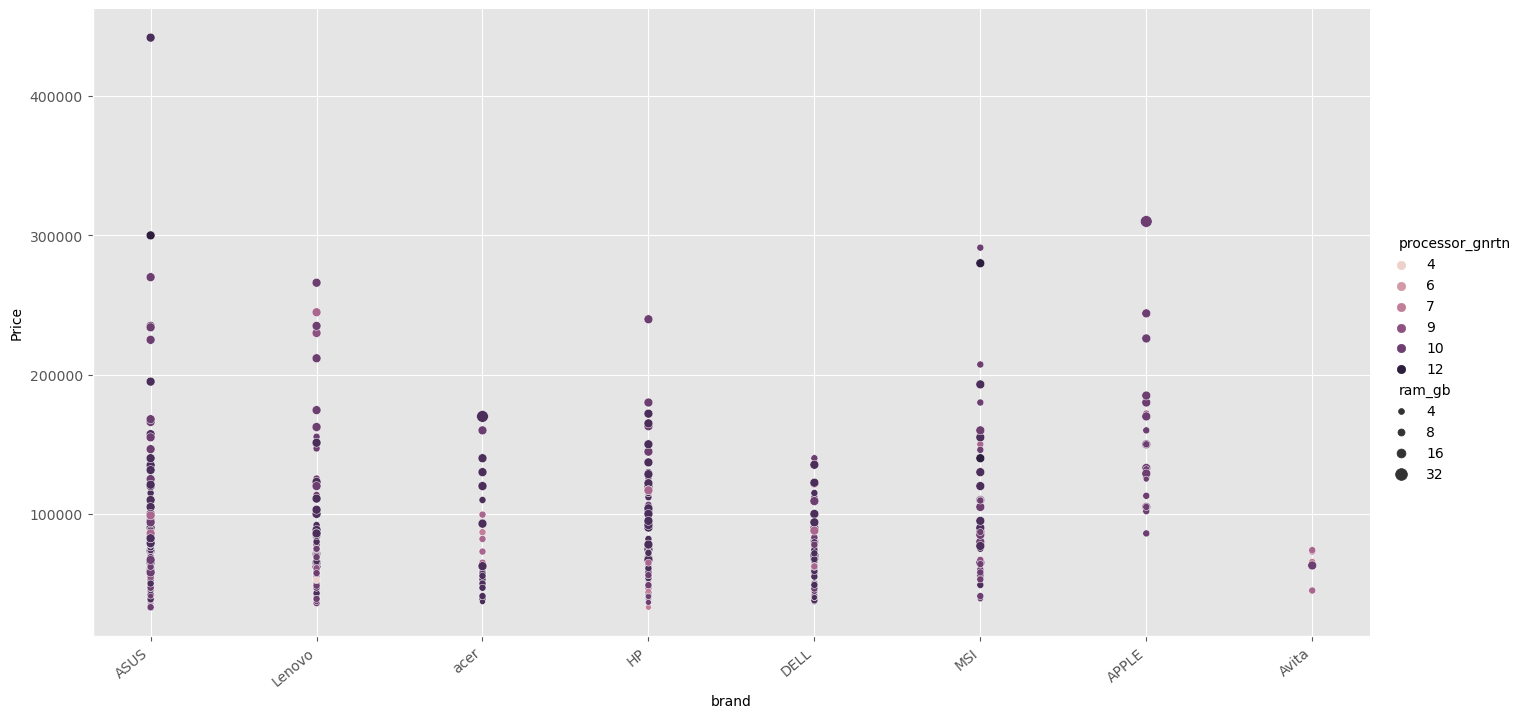

In [22]:
ax=sns.relplot(x='brand',y='Price',data=dataset,hue='processor_gnrtn',size='ram_gb',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [23]:
#extracting training data
x=dataset[['brand','processor_brand','processor_name','processor_gnrtn','ram_gb','ssd',
           'hdd','Touchscreen','rating']]
y=dataset['Price']

In [24]:
x

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,Touchscreen,rating
0,ASUS,Intel,Core i3,10,4,0,1024,0,2
1,Lenovo,Intel,Core i3,10,4,0,1024,0,3
2,Lenovo,Intel,Core i3,10,4,0,1024,0,3
3,ASUS,Intel,Core i5,10,8,512,0,0,3
4,ASUS,Intel,Core i5,10,8,0,1024,0,3
...,...,...,...,...,...,...,...,...,...
554,APPLE,M1,M1,10,16,1024,0,0,4
555,APPLE,M1,M1,10,16,1024,0,0,4
556,APPLE,M1,M1,10,16,1024,0,0,4
557,APPLE,M1,M1,10,32,1024,0,0,5


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02)

In [26]:
y_test

65      40990
112     32890
447     86990
263     55490
299     67990
442    104000
146     38680
527    169990
67      43990
62      44376
129     39790
345     44990
Name: Price, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [28]:
ohe=OneHotEncoder()
ohe.fit(x[['brand','processor_brand','processor_name']])

OneHotEncoder()

In [29]:
column_transformer=make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                            ['brand','processor_brand','processor_name']),remainder='passthrough')

In [30]:
regressor=LinearRegression()

In [31]:
pipe=make_pipeline(column_transformer,regressor)

In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['APPLE', 'ASUS', 'Avita', 'DELL', 'HP', 'Lenovo', 'MSI', 'acer'],
      dtype=object),
                                                                            array(['AMD', 'Intel', 'M1'], dtype=object),
                                                                            array(['Core i3', 'Core i5', 'Core i7', 'Core i9', 'M1', 'Ryzen 5'],
      dtype=object)]),
                                                  ['brand', 'processor_brand',
                                                   'processor_name'])])),
                ('linearregression', LinearRegression())])

In [33]:
y_predict=pipe.predict(x_test)

In [34]:
print(y_predict)
print(y_test)

[ 26364.51265192  45519.9442861  123267.4349313   82787.95926192
  65115.2434973  128124.8102493   39239.62354441 262121.57054389
  32491.09407048  29962.01097065  35407.2598543   54389.93648665]
65      40990
112     32890
447     86990
263     55490
299     67990
442    104000
146     38680
527    169990
67      43990
62      44376
129     39790
345     44990
Name: Price, dtype: int64


In [35]:
r2_score(y_test,y_predict)

0.30948068618620195

In [36]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    regressor=LinearRegression()
    pipe=make_pipeline(column_transformer,regressor)
    pipe.fit(x_train,y_train)
    y_predict=pipe.predict(x_test)
    
    score = r2_score(y_test,y_predict)
    scores.append(score)
    index = np.argmax(score)
   
    
print(score)

0.49708199135297637


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = index)
regressor = LinearRegression()
pipe = make_pipeline(column_transformer, regressor)
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['APPLE', 'ASUS', 'Avita', 'DELL', 'HP', 'Lenovo', 'MSI', 'acer'],
      dtype=object),
                                                                            array(['AMD', 'Intel', 'M1'], dtype=object),
                                                                            array(['Core i3', 'Core i5', 'Core i7', 'Core i9', 'M1', 'Ryzen 5'],
      dtype=object)]),
                                                  ['brand', 'processor_brand',
                                                   'processor_name'])])),
                ('linearregression', LinearRegression())])

In [38]:
columns = ["brand", "processor_brand", "processor_name", "processor_gnrtn", "ram_gb","ssd","hdd",
           "Touchscreen","rating"]
data = np.array(['acer','AMD','Ryzen 5',10,4,0,512,0,4]).reshape(1, 9)
myinput = pd.DataFrame(columns = columns, data = data)
result = pipe.predict(myinput)
print(result)

[61709.91931274]


In [39]:
x

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,Touchscreen,rating
0,ASUS,Intel,Core i3,10,4,0,1024,0,2
1,Lenovo,Intel,Core i3,10,4,0,1024,0,3
2,Lenovo,Intel,Core i3,10,4,0,1024,0,3
3,ASUS,Intel,Core i5,10,8,512,0,0,3
4,ASUS,Intel,Core i5,10,8,0,1024,0,3
...,...,...,...,...,...,...,...,...,...
554,APPLE,M1,M1,10,16,1024,0,0,4
555,APPLE,M1,M1,10,16,1024,0,0,4
556,APPLE,M1,M1,10,16,1024,0,0,4
557,APPLE,M1,M1,10,32,1024,0,0,5


In [40]:
#ASUS,Intel,Core i3,10,4,0,1024,0,34649,2
columns = ["brand", "processor_brand", "processor_name", "processor_gnrtn", "ram_gb","ssd","hdd","Touchscreen","rating"]
data = np.array(['ASUS','Intel','Core i3',10,4,0,1024,0,2]).reshape(1, 9)
myinput = pd.DataFrame(columns = columns, data = data)
result = pipe.predict(myinput)
print(result)

[43059.97044007]


In [42]:
import pickle
pickle.dump(pipe,open('LinearRegresionMOdel.pkl','wb'))